In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/TCS.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1114.909302,366830.0
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1129.757202,925740.0
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1112.587769,1754242.0
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1071.570801,2423784.0
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1058.912842,2636332.0
...,...,...,...,...,...,...,...
1661,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,3871.300049,2320754.0
1662,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,3836.949951,1673362.0
1663,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,3779.149902,2253075.0
1664,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,3791.899902,2489161.0


In [ ]:
#df=df.drop(df["Open","High","Low","Adj Close","Volume"],axis="1")
df=df.drop(["Open","High","Low","Adj Close","Volume"],axis="columns")


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Date_encoded"]=le.fit_transform(df["Date"])


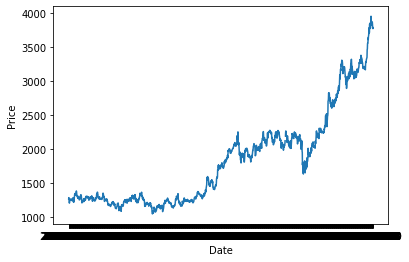

In [ ]:
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df["Date"],df["Close"])
x = np.array(df['Date_encoded'])
#x.astype(int)
y = np.array(df['Close'])
y.astype(int)
#print(type(x))
#print(type(y))
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
X=df["Date_encoded"]
X=np.array(df["Date_encoded"])
X=X.reshape(-1,1)
Y=df["Close"]


In [ ]:
type(X)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_test,Y_train=train_test_split(X,Y,test_size=0.3)

In [ ]:
df["Close"].isnull().sum()

3

In [ ]:
df["Close"].mean()

1825.2263996867096

In [ ]:
# Apne target function mai null values aare ; So null values ko mean se agar fill kiya toh model ki accuracy kam hojaegai ,
#  so nul values ke aage and picche ke values utha , unka mean le and null values mai fill kar 
# This is the function for the same
index=-1
for i in df["Close"]:
  index+=1
  if(i is None):
    avg=(df["Close"][index-1]+df["Close"][index+1])/2
    df["Close"][index]=avg


df["Close"].isnull().sum()

3

In [ ]:
type(df["Date"][0])

str

In [ ]:
# function to get unique values
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))

In [ ]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [ ]:
# Finding the index where nulll value lies

find=[]
find=df["Close"]
# find.index(None)
#None in find
#print(find)
type(list(find))
find = list(find)
#print(find)
count = 0
#NULL in find
for tryv in find:
  if(isfloat(tryv)):
    count = count + 1
    pass
  else:
    print(tryv)

#print(count)
#print(len(find

if 'nan' in find:
  print("hi")


Remember this line to get Null values from the given dataframe

In [ ]:
type(df["Close"].isnull())

pandas.core.series.Series

In [ ]:
df[df['Close'].isnull()].index

Int64Index([40, 1185, 1449], dtype='int64')

In [ ]:
temp_nan_column = df[df['Close'].isnull()].index.tolist()
temp_nan_column

[40, 1185, 1449]

In [ ]:
print(find[1185])
print(find[40])
print(find[1449])

nan
nan
nan


In [ ]:
for i in temp_nan_column:
  avg=(find[i-1]+find[i+1])/2
  print(avg)


1332.9375
2159.9000244999997
2661.4500735


In [ ]:
for i in range(len(temp_nan_column)):
  avg = (find[temp_nan_column[i] - 1]  ) + (find[temp_nan_column[i] + 1])
  avg = avg/2
  print(avg)

1332.9375
2159.9000244999997
2661.4500735


In [ ]:
df.shape

(1666, 3)

In [ ]:
hemang = df.copy(deep=True)

In [ ]:
hemang.shape

(1666, 3)

In [ ]:
hemang_find = find
for i in temp_nan_column:
  avg=(find[i-1]+find[i+1])/2
  #print(avg)
  find[i] = avg
  hemang_find[i] = df["Close"].mean()
#unique(find)
#unique(hemang_find)

In [ ]:
df['Close'] = find
hemang['Close'] = hemang_find

In [ ]:
print(df.shape)
print(hemang.shape)

(1666, 3)
(1666, 3)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df.head()

,Date,Close,Date_encoded
0,2015-01-01,1272.775024,0
1,2015-01-02,1289.724976,1
2,2015-01-05,1270.125000,2
3,2015-01-06,1223.300049,3
4,2015-01-07,1208.849976,4


In [ ]:
df

TypeError: ignored

In [ ]:
X_train,X_test,Y_test,Y_train=train_test_split(df['Date_encoded'],df['Close'],test_size=0.3)


In [ ]:
len(X_train)
len(Y_train)

500

In [ ]:
len(Y_test)

1166

1033    1033
97        97
238      238
127      127
1249    1249
        ... 
993      993
828      828
1053    1053
381      381
1458    1458
Name: Date_encoded, Length: 1166, dtype: int64

In [ ]:
print(len(X_test))
print(len(Y_test))
print(len(X_train))
print(len(Y_train))

500
1166
1166
500


In [ ]:
len(X_train)
len(X_test)

500

In [ ]:
df.shape

(1666, 3)

In [ ]:
type(X_train)

pandas.core.series.Series

In [ ]:
lr=LinearRegression()
X=np.array(X_train)

Y=np.array(Y_test)
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)
model=lr.fit(X,Y)

X_=np.array(X_test)
Y_=np.array(Y_train)
X_=X_.reshape(-1,1)
Y_=Y_.reshape(-1,1)


model.score(X_,Y_)


0.7895307724141744

In [ ]:
# lr = LinearRegression()
# X = np.array(df['Date_encoded'])
# X = X.reshape(-1,1)
# Y = np.array(df['Close'])
# Y = Y.reshape(-1,1)
# model = lr.fit(X,Y)
# X_test=np.array(X_test).reshape(-1,1)
# Y_test= np.array(Y_test).reshape(-1,1)
# model.score(X_test,Y_test)

In [ ]:
# lr = LinearRegression()
# X = np.array(hemang['Date_encoded'])
# X = X.reshape(-1,1)
# Y = np.array(hemang['Close'])
# Y = Y.reshape(-1,1)
# model = lr.fit(X,Y)
# model.score(X_test,Y_test)